## Consegna
Si richiede un'implementazione di un esercizio di Topic Modeling, utilizzando librerie open (come ad es. GenSim (https://radimrehurek.com/gensim/). Si richiede l'utilizzo di un corpus di almeno 1k documenti. Testare un algoritmo (ad esempio LDA) con più valori di k (num. di topics) e valutare la coerenza dei risultati, attraverso fine-tuning su parametri e pre-processing. Update: essendo che spesso i topic, per essere interpretabili, devono contenere content words, potete pensare di filtrare solamente i sostantivi in fase di preprocessing (cioè POS=noun).

## Import

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

## Caricamento Corpus 

In [2]:
# Carica il corpus 20 Newsgroups
newsgroups = fetch_20newsgroups(
    subset='all', remove=('headers', 'footers', 'quotes'))


## Estrazione sostantivi e pulizia del corpus

In [3]:
# Estrai i sostantivi dai documenti e crea il corpus
stop_words = set(stopwords.words('english'))
corpus = []
for document in newsgroups.data:
    words = word_tokenize(document)
    words = [word.lower() for word in words if word.isalpha()
             and word.lower() not in stop_words]
    tagged_words = pos_tag(words)
    nouns = [word for word, pos in tagged_words if pos == 'NN']
    corpus.append(nouns)

## Creazione del dizionario e del corpus in formato bag-of-words

In [4]:

dictionary = Dictionary(corpus)
corpus_bow = [dictionary.doc2bow(doc) for doc in corpus]


## Test di diversi valori di k (num. di topics)

In [5]:

k_values = [5, 10, 15, 20, 25, 30, 40, 50, 75, 100, 150]
coherence_scores = []

for k in k_values:
    lda_model = LdaModel(corpus_bow, num_topics=k, id2word=dictionary)
    coherence_model = CoherenceModel(
        model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"Number of topics: {k}, Coherence Score: {coherence_score}")


Number of topics: 5, Coherence Score: 0.6226784932739413
Number of topics: 10, Coherence Score: 0.5680773416899705
Number of topics: 15, Coherence Score: 0.573710192276113
Number of topics: 20, Coherence Score: 0.5382469615004047
Number of topics: 25, Coherence Score: 0.5338617441789824
Number of topics: 30, Coherence Score: 0.5390783295430032
Number of topics: 40, Coherence Score: 0.5346679105458627
Number of topics: 50, Coherence Score: 0.5106080831602586
Number of topics: 75, Coherence Score: 0.4951249218758946
Number of topics: 100, Coherence Score: 0.47502482265188767
Number of topics: 150, Coherence Score: 0.4662722808479172


## Stampa dei risultati

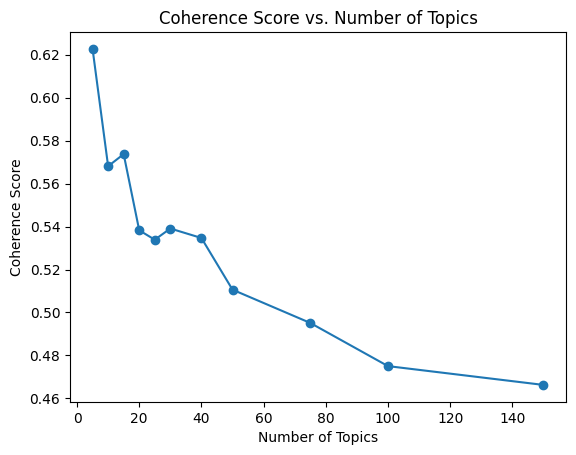

In [6]:
# Plot dei risultati
plt.plot(k_values, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics')
plt.show()
